In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow.examples.tutorials.mnist.input_data as input_data
from time import time

In [2]:
mnist = input_data.read_data_sets('../../datasets', one_hot = True)
print(mnist.train.num_examples)
print(mnist.validation.num_examples)
print(mnist.test.num_examples)

Extracting ../../datasets/train-images-idx3-ubyte.gz
Extracting ../../datasets/train-labels-idx1-ubyte.gz
Extracting ../../datasets/t10k-images-idx3-ubyte.gz
Extracting ../../datasets/t10k-labels-idx1-ubyte.gz
55000
5000
10000


In [3]:
# print(mnist.train.images[0])
print(mnist.train.images.shape)
print(mnist.train.labels[0])
print(mnist.train.labels.shape)

(55000, 784)
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
(55000, 10)


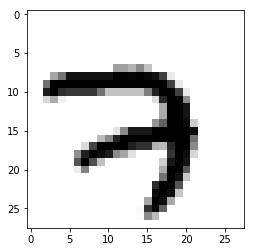

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
7


In [4]:
def plot_image(image):
    plt.imshow(image.reshape(28, 28), cmap = 'binary')
    plt.show()

plot_image(mnist.train.images[0])
print(mnist.train.labels[0])
print(np.argmax(mnist.train.labels[0]))

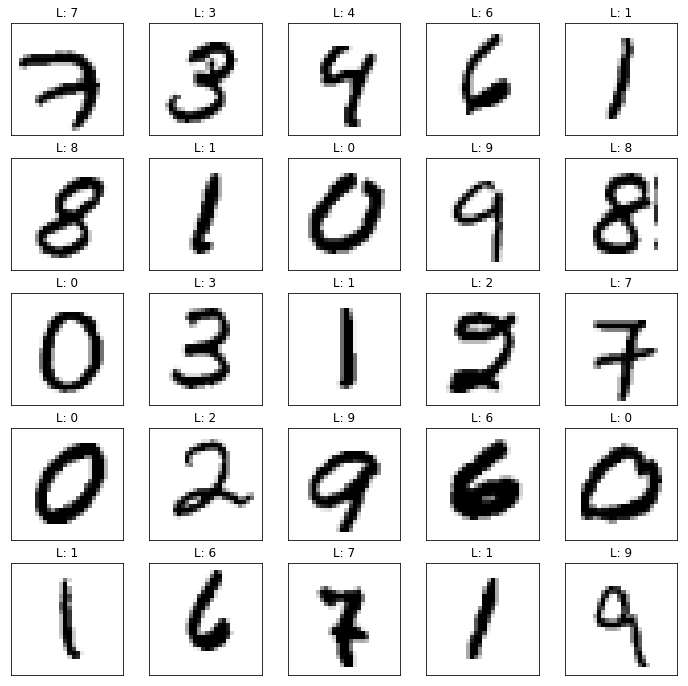

In [5]:
def plot_images_labels_prediction(images, labels, prediction, idx, num = 25):
    fig = plt.gcf()
    fig.set_size_inches(12, 12)
    if num > 25:
        num = 25
    for i in range(0, num):
        ax = plt.subplot(5, 5, i + 1)
        ax.imshow(np.reshape(images[idx], (28, 28)), cmap = 'binary')
        title = 'L: ' + str(np.argmax(labels[idx]))
        if len(prediction) > 0:
            title += ' P: ' + str(prediction[idx])
        ax.set_title(title, fontsize = 12)
        ax.set_xticks([])
        ax.set_yticks([])
        idx += 1
    plt.show()
    
plot_images_labels_prediction(mnist.train.images, mnist.train.labels, [], 0)

In [6]:
batch_images_xs, batch_labels_ys = mnist.train.next_batch(batch_size = 100)
print(len(batch_images_xs))
print(len(batch_labels_ys))

100
100


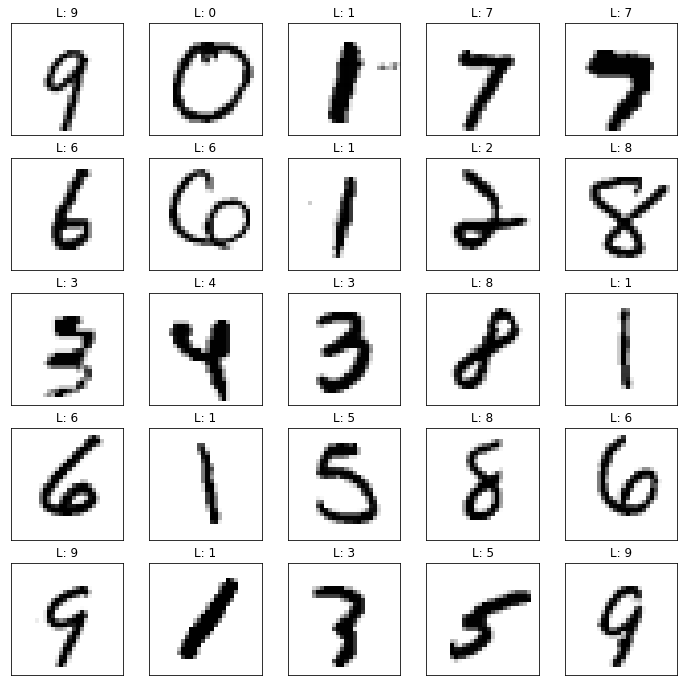

In [7]:
plot_images_labels_prediction(batch_images_xs, batch_labels_ys, [], 0)

# Model

In [8]:
def layer(output_dim, input_dim, inputs, activation = None):
    W = tf.Variable(tf.random_normal([input_dim, output_dim]))
    b = tf.Variable(tf.random_normal([1, output_dim]))    
    XWb = tf.matmul(inputs, W) + b
    if activation is None:
        outputs = XWb
    else:
        outputs = activation(XWb)
    return outputs

### Input Layer

In [9]:
x = tf.placeholder('float', [None, 784])

### Hidden Layer 1

In [10]:
h1 = layer(output_dim = 1000, input_dim = 784, inputs = x, activation = tf.nn.relu)

### Hidden Layer 2

In [11]:
h2 = layer(output_dim = 1000, input_dim = 1000, inputs = h1, activation = tf.nn.relu)

### Output Layer

In [12]:
y_predict = layer(output_dim = 10, input_dim = 1000, inputs = h2, activation = None)

### Loss Function

In [13]:
y_label = tf.placeholder('float', [None, 10])
loss_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = y_predict, labels = y_label))

### Optimizer

In [14]:
optimizer = tf.train.AdamOptimizer(learning_rate = 0.001).minimize(loss_function)

### Accuracy

In [15]:
correct_prediction = tf.equal(tf.argmax(y_label, 1), tf.argmax(y_predict, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, 'float'))

# Train

In [16]:
train_epochs = 15
batch_size = 100
total_batchs = int(mnist.train.num_examples / batch_size)
loss_list = []
epoch_list = []
accuracy_list = []
start_time = time()
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for epoch in range(train_epochs):
    for i in range(total_batchs):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        sess.run(optimizer, feed_dict = {x: batch_x, y_label: batch_y})
    loss, acc = sess.run([loss_function, accuracy], feed_dict = {x: mnist.validation.images, y_label: mnist.validation.labels})
    epoch_list.append(epoch)
    loss_list.append(loss)
    accuracy_list.append(acc)
    print('Train Epoch: %d Loss: %f Accuracy: %f' % ((epoch + 1), loss, acc))
duration = time() - start_time
print('Accuracy: ', sess.run(accuracy, feed_dict = {x: mnist.test.images, y_label: mnist.test.labels}))
print('Time: ', duration)

Train Epoch: 1 Loss: 153.866928 Accuracy: 0.902400
Train Epoch: 2 Loss: 85.383278 Accuracy: 0.942000
Train Epoch: 3 Loss: 69.804817 Accuracy: 0.947600
Train Epoch: 4 Loss: 61.960724 Accuracy: 0.956200
Train Epoch: 5 Loss: 53.191257 Accuracy: 0.957400
Train Epoch: 6 Loss: 53.228462 Accuracy: 0.957200
Train Epoch: 7 Loss: 52.462700 Accuracy: 0.957600
Train Epoch: 8 Loss: 50.843567 Accuracy: 0.966000
Train Epoch: 9 Loss: 50.774166 Accuracy: 0.966800
Train Epoch: 10 Loss: 50.609516 Accuracy: 0.964000
Train Epoch: 11 Loss: 49.393387 Accuracy: 0.969600
Train Epoch: 12 Loss: 50.492325 Accuracy: 0.968400
Train Epoch: 13 Loss: 56.496807 Accuracy: 0.965800
Train Epoch: 14 Loss: 46.325279 Accuracy: 0.969600
Train Epoch: 15 Loss: 49.823132 Accuracy: 0.965400
Accuracy:  0.9631
Time:  369.03222608566284


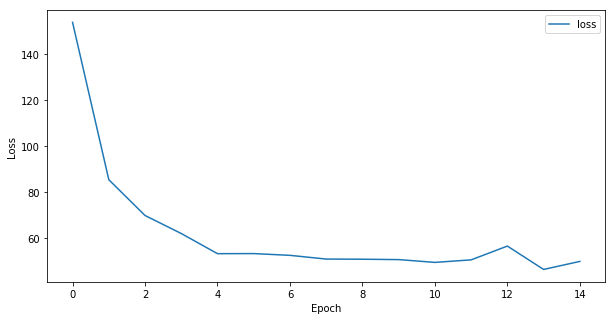

In [17]:
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.plot(epoch_list, loss_list, label = 'loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['loss'])
plt.show()

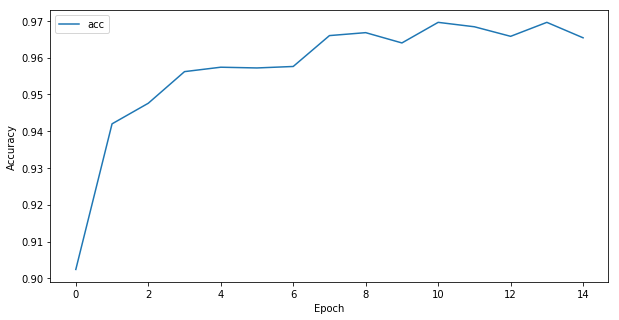

In [18]:
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.plot(epoch_list, accuracy_list, label = 'Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['acc'])
plt.show()

# Predict

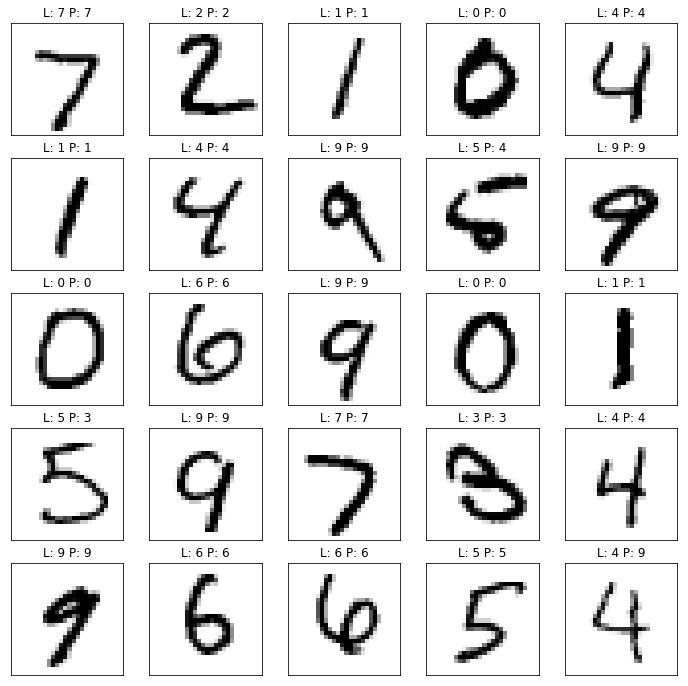

In [19]:
prediction_result = sess.run(tf.argmax(y_predict, 1), feed_dict = {x: mnist.test.images})
plot_images_labels_prediction(mnist.test.images, mnist.test.labels, prediction_result, 0)